In [27]:
import stanscofi.utils
import stanscofi.datasets
import stanscofi.validation
import stanscofi.training_testing
from time import time

rseed=12454655

# I. Dataset

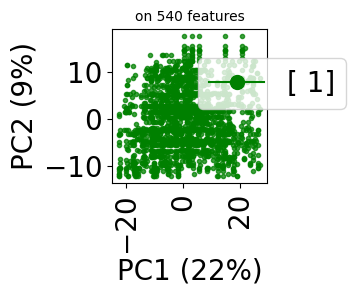

In [5]:
dataset_name="Gottlieb"
dataset_folder="datasets/"

data_args = stanscofi.utils.load_dataset(dataset_name, dataset_folder)
dataset = stanscofi.datasets.Dataset(**data_args)

dataset.visualize(withzeros=False, figsize=(2,2))

# II. Algorithm

In [28]:
import sys
sys.path.insert(0, "../src/")
from importlib import reload

import benchscofi.PulearnWrapper
from sklearn.svm import SVC

reload(benchscofi.PulearnWrapper)

params = {
    "classifier_params":{"estimator": SVC(C=5., kernel='rbf', gamma=0.4, probability=True),"hold_out_ratio": 0.2},
    "classifier": "ElkanotoPuClassifier",
    "preprocessing_str": "meanimputation_standardize",
    "subset": None,
}

template = benchscofi.PulearnWrapper.PulearnWrapper

# III. Metrics

In [29]:
print(stanscofi.validation.metrics_list)

['AUC', 'Fscore', 'TAU', 'Rscore', 'MRR', 'RP', 'PrecisionK', 'RecallK', 'F1K', 'AP', 'MAP', 'DCGk', 'NDCGk', 'MeanRank', 'HRk', 'ERR']


# IV. Cross-validation

In [ ]:
start = time()

results = stanscofi.training_testing.cv_training(template, params, dataset, threshold=0, metric="AUC", 
            k=5, test_size=0.2, beta=1, njobs=1, nsplits=2, random_state=rseed, cv_type="random", 
            show_plots=True, verbose=True)

print("Elapsed time %.3f sec" % (time()-start))

# Random splitting of data 

(trying to reproduce paper results even with correlated drugs in the testing and training sets)

# Recently reported AUC values in the literature

Algorithm (ref) / Dataset (AUC) | Gottlieb | Cdataset | DNdataset 
------------------------------- | -------- | -------- | ---------- 
HAMN (reported in [1])          | 0.946               | 0.958             | N/A
ANMF (reported in [1])          | 0.938 (from [2])    | 0.952 (from [2])  | N/A
BNNR (reported in [1])          | 0.932               | 0.948             | N/A
DRRS (reported in [1])          | 0.930 (from [2])    | 0.947 (from [2])  | N/A
HGBI (reported in [1])          | 0.829 (from [2])    | 0.858 (from [2])  | N/A
GMF (reported in [2])           | 0.880               | N/A               | N/A
SSLDR (reported in [3])         | 0.982               | 0.987             | 0.978
LRSSL (reported in [4])         |                     |                   |

[1](https://bmcbioinformatics.biomedcentral.com/counter/pdf/10.1186/s12859-020-03898-4.pdf) doi:10.1186/s12859-020-03898-4 (Tables 3 and 4)

[2](https://bmcbioinformatics.biomedcentral.com/counter/pdf/10.1186/s12859-019-2983-2.pdf) doi:10.1186/s12859-019-2983-2 (Tables 3 and 5)

[3](https://arxiv.org/pdf/2206.00262.pdf) arxiv:2206.00262 (Table 2, Table 4 reports comparisons with algorithms not restricted to drug repurposing)
      
Algorithm (ref) / Dataset (AUC) | PREDICT-Gottlieb | LRSSL
------------------------------- | -------- | -------- 
PREDICT (reported in [4])       | 0.902 (from [5])    | N/A            
NTSIM (reported in [4])         | 0.921 (from [5])    | 0.902 (from [5]) 
DDA-SKF (reported in [4])       | 0.929               | 0.931             
LRSSL (reported in [4])         | N/A                 | 0.825 (from [5])   

[4](https://www.frontiersin.org/articles/10.3389/fphar.2021.784171/full) doi:10.3389/fphar.2021.784171 (Table 2)

[5](https://pubmed.ncbi.nlm.nih.gov/29879508/) doi:10.1016/j.ymeth.2018.06.001 (behind a paywall)